In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Modeling stock prices - Black-Scholes Model

<div class="alert alert-info">
    
    
We will now model stock price behavior using the <a href="https://en.wikipedia.org/wiki/Black_Scholes_model" targer="_blank">Black-Scholes model</a>, which employs a type of log-normal distribution to represent the growth of the stock price. Conceptually, this representation consists of two pieces:

a) Growth based on interest rate only


b) Volatility of the market



Stock prices evolve over time, with a magnitude dependent on their volatility. **The Black Scholes model treats this evolution in terms of a random walk**. To use the Black-Scholes model we assume:

   - some volatility of stock price.  Call this $\sigma$
   - a (risk-free) interest rate called $r$; and
   - the price of the asset is [geometric Brownian motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion), or in other words the log of the random process is a normal distribution.

which leads to the following expression for the predicted asset price:

$$ S_T = S_0 e^{(r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} \,\epsilon}$$

meaning $ S_T/S_0 $ are normally distributed with mean $(r - \frac{\sigma^2}{2})T$ and variance  $\sigma^2 T$, where 

   - $\sigma$ is the volatility, or standard deviation on returns.
   - $\epsilon$ is a random value sampled from the normal distribution $\mathcal{N}(0,1)$
   - $S_T$ price of the asset at time $T$
   - $S_0$ initial price of the asset 
   - $r$ is the interest rate
    
</div>

To predict the asset price at time $T$, we will discretize the total time to maturity in small steps $\Delta t$. For each increment, we will use:

$$ S_{t+\Delta t} = S_t e^{(r - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t} \,\epsilon}$$

For example, if we want to obtain the asset price after 30 days, and we use the assumption that prices change with the increment of one day, then our total number of price estimates $S_t$ is $N = 30$, and $\Delta t = 1/N$.

#### 1) Write the function `St_GBM` that will compute the price of an asset at time $t+\Delta t$ given the parameters 
($S_t,r,\sigma,\Delta t$)


Use the function `np.random.normal()` to generate the random variable $\epsilon$

Remember **NOT** to use any other random function (aside from `np.random.normal()`) inside `St_GBM`.


In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def St_GBM(St, r, sigma, deltat):

    epsilon = np.random.normal()
    St_next = St * np.e**((r - (sigma**2) / 2) * deltat + sigma * np.sqrt(deltat) * epsilon)
    
    return St_next

This model now gives us a more accurate way to predict the future price. In this first example, use the values for initial asset price `S0`, interest rate `r` and volatility `sigma` provided below. We will compute the daily price movements for a period of `N = 252` days (typical number of trading days in a year). 

In [17]:
S0 = 100        # initial asset value
r = 0.05        # interest rate
sigma = 0.1     # volatility
N = 252         # number of trading days
deltat= 1/N     # time step 

#### 2) Compute the daily asset prices over the period of one trading year:
Write a code snippet that computes the 1d numpy array `price` with shape `(N,)` that contains the daily price movements given by the Black-Scholes Model. 

**You must call your function `St_GBM`.** Recall the first entry of `price` is `S0`.

In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
price = [S0]
while (len(price) < N):
    cur_price = price[-1]
    for i in range(0, 252):
        cur_price = St_GBM(cur_price, r, sigma, deltat)
    price.append(cur_price)
    
price = np.array(price)

Plot your results:

(50.0, 150.0)

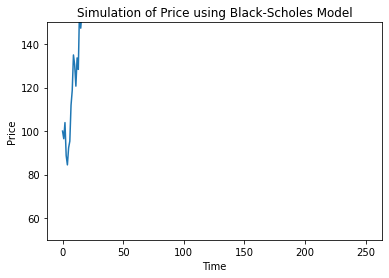

In [ ]:
plt.plot(price)   
plt.title('Simulation of Price using Black-Scholes Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.ylim([50,150])

**Unfortunately volatility is usually not this small....** :-(

Write the function `simulate_BS_price` that returns the numpy array `price` for the given input variables (recall the first entry of `price` is `S0`). You have already done all the work to compute `price`, you just need to wrap your previous code inside a function. Make sure you are not hard-coding any variable (your function should work for any `S0, r, sigma, N` values). The function `simulate_BS_price` should call your pre-defined function `St_GBM` (do not copy the function `St_GBM` here again). Recall that $\Delta t = 1/N$.

In [13]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def simulate_BS_price(S0, r, sigma, N):  
    
    price = [S0]
    while (len(price) < N):
        cur_price = price[-1]
        cur_price = St_GBM(cur_price, r, sigma, 1 / N)
        price.append(cur_price)

    price = np.array(price)
    return price

And take a look at what happens to your stock prices when you increase the volatility. Run the code snippet below with different values for sigma

Text(0, 0.5, 'Price')

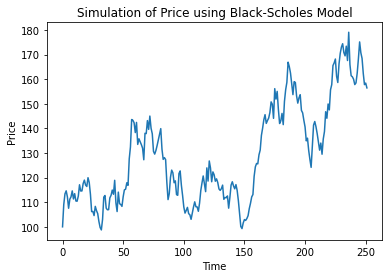

In [14]:
sigma = 0.5
price_sigma = simulate_BS_price(100, 0.05, sigma, 252)
plt.plot(price_sigma)   
plt.title('Simulation of Price using Black-Scholes Model')
plt.xlabel('Time')
plt.ylabel('Price')

We have managed to successfully simulate a year’s worth of future daily price data. Unfortunately this does not provide insight into risk and return characteristics of the stock as we only have one randomly generated path. The likelyhood of the actual price evolving exactly as described in the above charts is pretty much zero. We should modify the above code to run multiple numerical experiments (or simulations). 

#### Perform M=1000 different numerical experiments, each one with N = 252 days

In [36]:
N = 252
M = 1000

For each numerical experiment, determine the array `price` using N = 252 days.

Compute the 2d array `price_M` with shape `(N,M)`, where each column stores the array `price` for each numerical experiment. Use your already defined function `simulate_BS_price`.

In [52]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
price_M = []
for i in range(0, M):
    price = simulate_BS_price(S0, r, sigma, N)
    price_M.append(price)
    
price_M = np.array(price_M)
price_M = price_M.T

Then plot the result using:

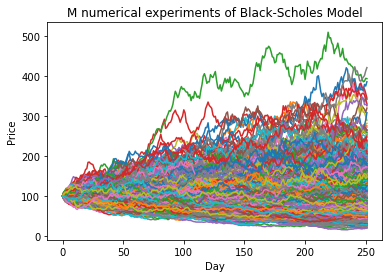

In [53]:
plt.figure()
plt.plot(price_M);
plt.title ('M numerical experiments of Black-Scholes Model');
plt.xlabel('Day');
plt.ylabel('Price');

The spread of final prices is quite large! Let's take a further look at this spread. Define the variable `predicted_prices` to store the predicted asset prices for day 252 (last day) for all the M=1000 numerical experiments. 

In [54]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
predicted_prices = price_M[N - 1]

Plot the histogram of the predicted prices:

Text(0, 0.5, 'Number of Occurrences')

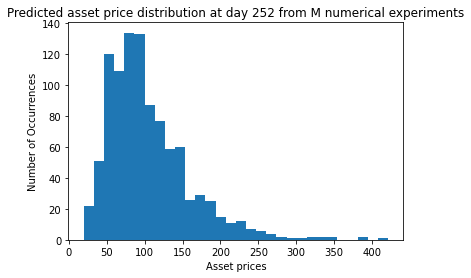

In [55]:
plt.figure()
plt.hist(predicted_prices,30);
plt.title('Predicted asset price distribution at day 252 from M numerical experiments')
plt.xlabel('Asset prices')
plt.ylabel('Number of Occurrences')

Define the variables

- `mean_price`: Calculate the mean of the distribution for the stock on the last day. 

- `std_price`: Calculate the standard deviation of the distribution for the stock on the last day. 

in the grade cell below:


In [56]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
mean_price = np.mean(predicted_prices)
std_price = np.std(predicted_prices)

Congratulations! You now have a prediction for a future price for a given stock.

In [57]:
print('expected value for the future asset price = ', mean_price)
print('standard deviation for the future asset price = ', std_price)

expected value for the future asset price =  105.19745081944788
standard deviation for the future asset price =  54.679322008713605
